<a href="https://colab.research.google.com/github/snz-mlcoder/IMG_PROCESSING/blob/main/dogbreed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:

!pip install --upgrade tensorflow
!pip install --upgrade keras



In [11]:
!pip install scikit-learn


In [52]:
import numpy as np
import pandas as pd
from PIL import Image ,ImageOps
import matplotlib.pyplot as plt
import os
import cv2
import matplotlib.image as mp
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing
from sklearn.metrics import classification_report
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , Dropout ,Activation
from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import math



In [13]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
!tar -xvf /content/drive/MyDrive/dog.tar -C /content/



dog/
dog/Bernese_mountain_dog/
dog/Bernese_mountain_dog/n02107683_1003.jpg
dog/Bernese_mountain_dog/n02107683_1071.jpg
dog/Bernese_mountain_dog/n02107683_1076.jpg
dog/Bernese_mountain_dog/n02107683_1175.jpg
dog/Bernese_mountain_dog/n02107683_1224.jpg
dog/Bernese_mountain_dog/n02107683_1244.jpg
dog/Bernese_mountain_dog/n02107683_1248.jpg
dog/Bernese_mountain_dog/n02107683_1255.jpg
dog/Bernese_mountain_dog/n02107683_1282.jpg
dog/Bernese_mountain_dog/n02107683_1317.jpg
dog/Bernese_mountain_dog/n02107683_1375.jpg
dog/Bernese_mountain_dog/n02107683_1400.jpg
dog/Bernese_mountain_dog/n02107683_1412.jpg
dog/Bernese_mountain_dog/n02107683_1417.jpg
dog/Bernese_mountain_dog/n02107683_1421.jpg
dog/Bernese_mountain_dog/n02107683_1429.jpg
dog/Bernese_mountain_dog/n02107683_1460.jpg
dog/Bernese_mountain_dog/n02107683_1468.jpg
dog/Bernese_mountain_dog/n02107683_1536.jpg
dog/Bernese_mountain_dog/n02107683_1542.jpg
dog/Bernese_mountain_dog/n02107683_160.jpg
dog/Bernese_mountain_dog/n02107683_1629.jpg
do

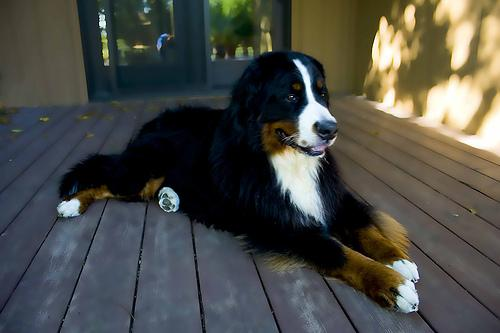

In [15]:
bernes_mountain_dog = []
for file in os.listdir('dog/Bernese_mountain_dog'):
    im = Image.open('dog/Bernese_mountain_dog'+'/'+file)
    bernes_mountain_dog.append(im)
display(random.choice(bernes_mountain_dog))

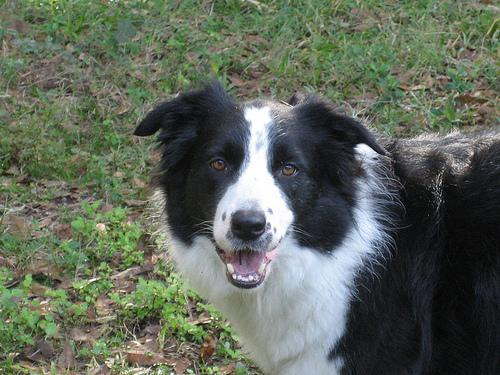

In [16]:
Border_collie = []
for file in os.listdir('dog/Border_collie'):
    im = Image.open('dog/Border_collie'+'/'+file)
    Border_collie.append(im)
display(random.choice(Border_collie))

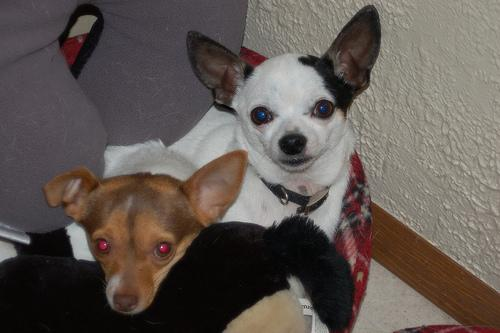

In [17]:
Chihuahua = []
for file in os.listdir('dog/Chihuahua'):
    im = Image.open('dog/Chihuahua'+'/'+file)
    Chihuahua.append(im)
display(random.choice(Chihuahua))

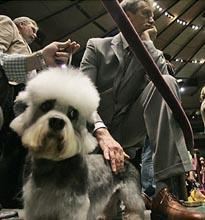

In [18]:
Dandie_Dinmont = []
for file in os.listdir('dog/Dandie_Dinmont'):
    im = Image.open('dog/Dandie_Dinmont'+'/'+file)
    Dandie_Dinmont.append(im)
display(random.choice(Dandie_Dinmont))

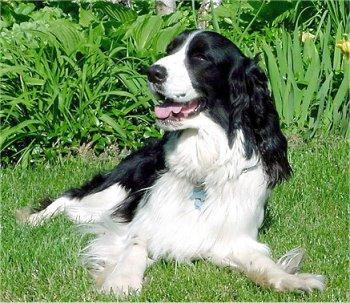

In [19]:
Japanese_spaniel = []
for file in os.listdir('dog/Japanese_spaniel'):
    im = Image.open('dog/Japanese_spaniel'+'/'+file)
    Japanese_spaniel.append(im)
display(random.choice(Japanese_spaniel))

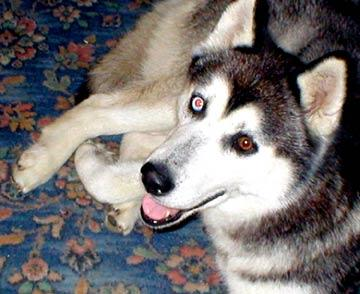

In [20]:
Siberian_husky = []
for file in os.listdir('dog/Siberian_husky'):
    im = Image.open('dog/Siberian_husky'+'/'+file)
    Siberian_husky.append(im)
display(random.choice(Siberian_husky))

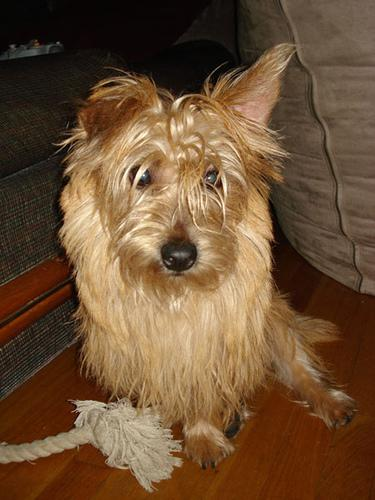

In [21]:
cairn = []
for file in os.listdir('dog/cairn'):
    im = Image.open('dog/cairn'+'/'+file)
    cairn.append(im)
display(random.choice(cairn))

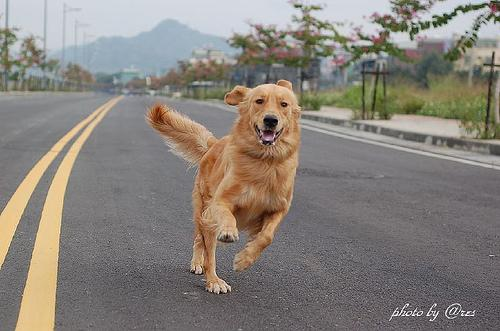

In [22]:
golden_retriever= []
for file in os.listdir('dog/golden_retriever'):
    im = Image.open('dog/golden_retriever'+'/'+file)
    golden_retriever.append(im)
display(random.choice(golden_retriever))

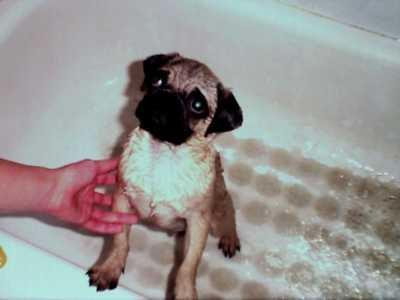

In [23]:
pug = []
for file in os.listdir('dog/pug'):
    im = Image.open('dog/pug'+'/'+file)
    pug.append(im)
display(random.choice(pug))

In [31]:
num_samples = 5
random_samples = random.sample(i, num_samples)

for img in random_samples:
    print("Size:", img.size)        # اندازه تصویر (عرض، ارتفاع)
    print("Mode:", img.mode)        # مد رنگی تصویر (مثل RGB، L و ...)
    print("Format:", img.format)    # فرمت تصویر (مثل JPEG، PNG و ...)
    print("-------")

Size: (334, 500)
Mode: RGB
Format: JPEG
-------
Size: (375, 500)
Mode: RGB
Format: JPEG
-------
Size: (500, 375)
Mode: RGB
Format: JPEG
-------
Size: (500, 437)
Mode: RGB
Format: JPEG
-------
Size: (500, 333)
Mode: RGB
Format: JPEG
-------


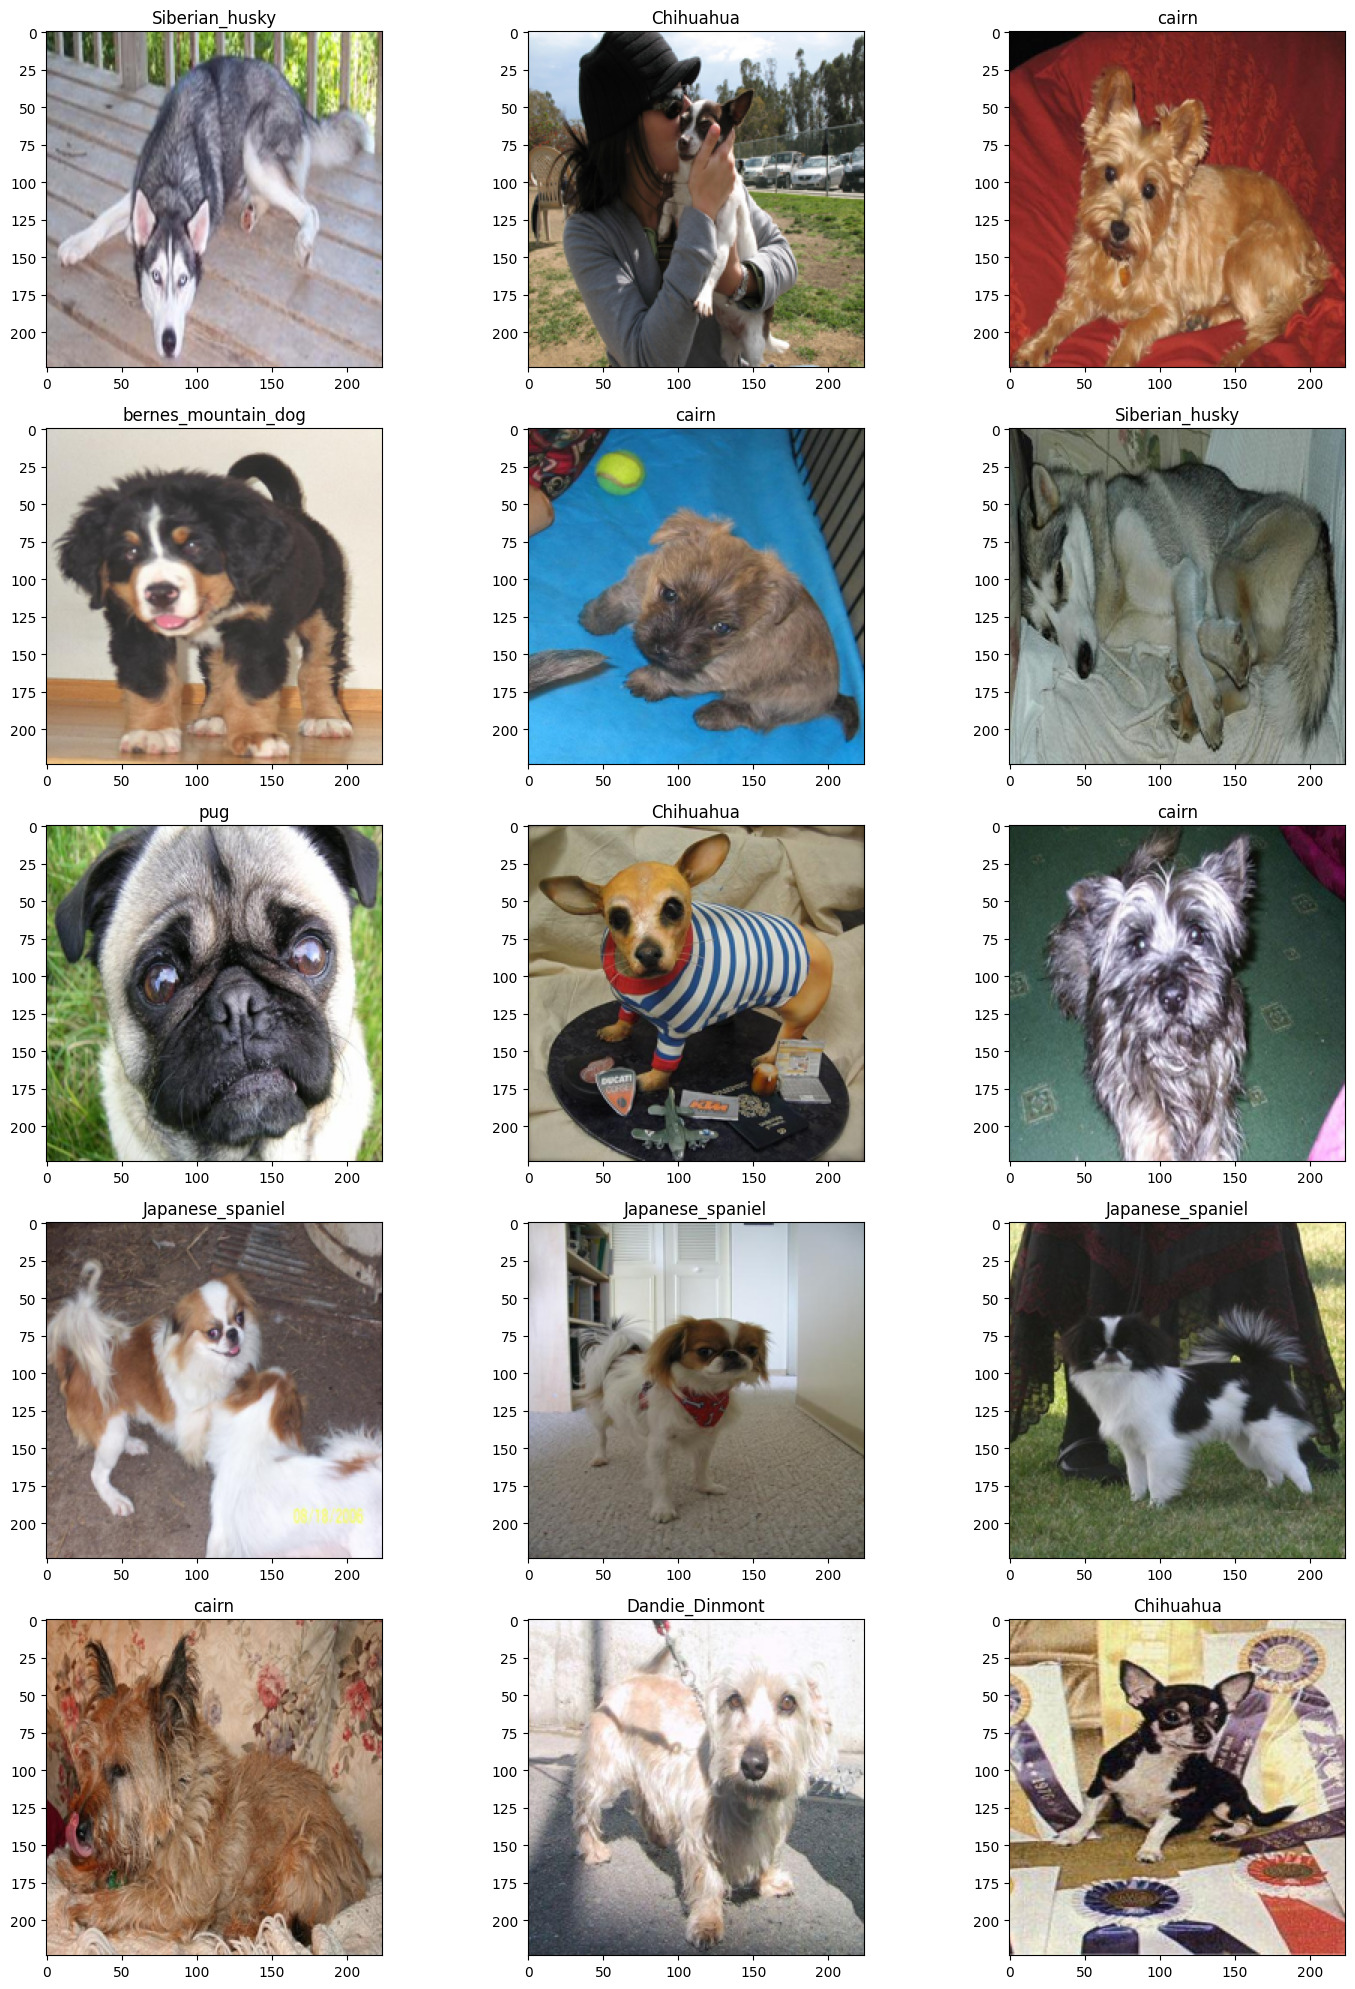

In [67]:

breeds = ['bernes_mountain_dog', 'Border_collie', 'Chihuahua', 'Dandie_Dinmont', 'Japanese_spaniel', 'Siberian_husky', 'cairn', 'golden_retriever', 'pug']

# بارگذاری و تغییر اندازه تصاویر
images = []
labels = []
for i, breed in enumerate(breeds):
    breed_images = globals()[breed]  # لیست تصاویر برای نژاد خاص
    for img in breed_images:
        img.thumbnail((225, 225), Image.LANCZOS)
        images.append(img)
        labels.append(i)

# انتخاب تصادفی تصاویری از هر نژاد (اگر تعداد تصاویر زیاد باشد)
num_images_to_display = min(15, len(images))  # نمایش حداکثر 15 تصویر برای نمونه
selected_images = random.sample(images, num_images_to_display)
selected_labels = [labels[images.index(img)] for img in selected_images]

# محاسبه تعداد ردیف‌ها
num_rows = math.ceil(num_images_to_display / 3)
height = max(4, num_rows * 4)

# تنظیم اندازه شکل و نمایش تصاویر
plt.figure(figsize=(15, height))
for i, image in enumerate(selected_images):
    plt.subplot(num_rows, 3, i + 1)
    plt.imshow(image)
    plt.title(breeds[selected_labels[i]])

plt.tight_layout()
plt.show()
